# Graph
- Vertices (Vertex)
- Edges (Edge)

It could be:
- Directed
- Undirected


### Adjacency Matrix
Use 2-D array to represent edges between vertices. Good for **dense graph**.

#### Advantages:
- O(1): access edge between 2 vertices
- O(1): add or remove an edge

#### Disadvantages:
- O(V): find all edges of a vertex
- Space cost O(V**2)

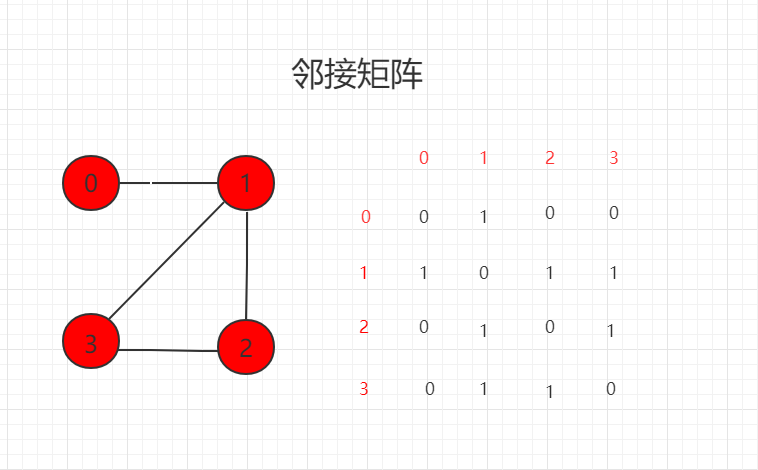

### Adjacency List
Use a linked-list/dynamic-list to store all edges/neighbours of each vertex. Good for **sparse graph**.

#### Advantages:
- < O(V): find all edges of a vertex
- O(1): add an edge
- Space cost O(V)

#### Disadvantages:
- O(V): access edge between 2 vertices
- O(V): remove an edge

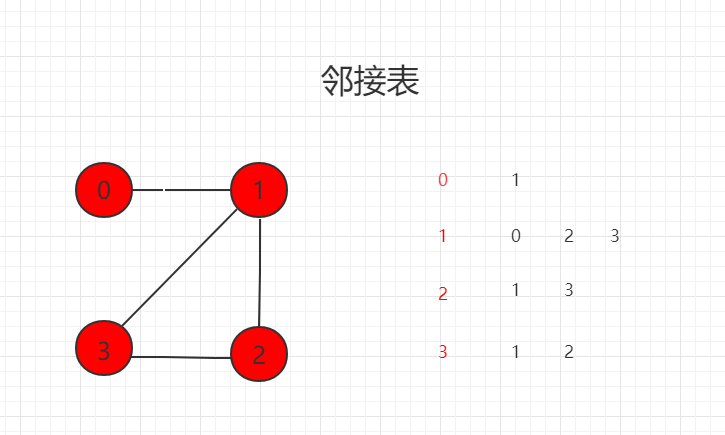

## Adjacency Matrix

In [1]:
import numpy as np

class GraphMatrix():
    def __init__(self, V = 0, directed = False):
        self.V = V
        self.E = 0
        self.directed = directed        
        self.graph = np.zeros((V, V))
        
    def add_edge(self, src, desc):
        if self.has_edge(src, desc):
            return
        self.graph[src, desc] = 1
        self.E = self.E + 1
        
        if not self.directed:
            self.graph[desc, src] = 1
        
    def has_edge(self, src, desc):
        return self.graph[src, desc]
    
g = GraphMatrix(4)
g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(2, 3)

g.graph

array([[0., 1., 0., 0.],
       [1., 0., 1., 1.],
       [0., 1., 0., 1.],
       [0., 1., 1., 0.]])

## Adjacency List

### With dynamic list

In [2]:
from collections import defaultdict

class GraphDynamicList():
    def __init__(self, V = 0, directed = False):
        self.V = V
        self.E = 0
        self.directed = directed
        self.graph = defaultdict(list)
        
    def add_edge(self, src, desc):
        if self.has_edge(src, desc):
            return
        self.graph[src].append(desc)
        self.E = self.E + 1
        
        if not self.directed:
            self.graph[desc].append(src)
        
    def has_edge(self, src, desc):
        return desc in self.graph[src]
            
g = GraphDynamicList(4)
g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(2, 3)

g.graph

defaultdict(list, {0: [1], 1: [0, 2, 3], 2: [1, 3], 3: [1, 2]})

### With linked list

In [3]:
class Node():
    def __init__(self, idx):
        self.idx = idx
        self.next = None
        
class GraphLinkedList():
    def __init__(self, V = 0, directed = False):
        self.V = V
        self.E = 0
        self.directed = directed
        self.graph = [None] * V
        
    def add_edge(self, src, desc):
        if self.has_edge(src, desc):
            return
        
        # new node point to head
        node = Node(desc)
        node.next = self.graph[src]
        # let new node be the head
        self.graph[src] = node
        
        self.E = self.E + 1
        
        if not self.directed:
            node = Node(src)
            node.next = self.graph[desc]
            self.graph[desc] = node
        
    def has_edge(self, src, desc):
        node = self.graph[src]
        while node:
            if node.idx == desc:
                return True
            node = node.next
        return False
    
    def print_graph(self):
        for idx, node in enumerate(self.graph):
            print(f"Vertex {idx}: ", end="")
            neighbours = []
            while node:
                neighbours.append(str(node.idx))
                node = node.next
            print("->".join(neighbours))
    
g = GraphLinkedList(4)
g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(2, 3)

g.print_graph()

Vertex 0: 1
Vertex 1: 3->2->0
Vertex 2: 3->1
Vertex 3: 2->1
